In [10]:
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Уравнение переноса

Численно решим уравнение переноса, представленное ниже, и сравним результат с аналитическим решением

Уравнение:
$$ \frac{\partial u}{\partial t} + 2 \frac{\partial u}{\partial x} = x^2 + 4 x t = f(x, t) $$
Начальные условия:
$$ u(x, 0) = \sin(10 \pi x) = \phi(x) $$
$$ u(0, t) = t^2 = \psi(t) $$

Аналитическое решение:
- Аналитическое решение соответствующего однородного будет иметь следующий вид:
$$ u_0(x, t) = \phi(x - 2t) + \psi(t - \frac{x}{2}) $$
(Считаем, что $\phi$ и $\psi$ тождественно равны нулю вне области задачи)
- Частное решение исходного уравнения с нулевыми начальными и граничными условиями будет иметь вид:
$$ u_1 = x^2 t $$
$$ u = u_1 + u_2 = \phi(x - 2t) + \psi(t - \frac{x}{2}) + x^2 t = \sin(10 \pi (x - 2t)) + (t - \frac{x}{2})^2 + x^2 t $$



In [13]:
!rm -f task8_1_data/*
!cd comp_math_rs && cargo run --release --bin task8_1

   Compiling comp_math_rs v0.1.0 (/home/vlad/Documents/VSCode/MiptCompMath/comp_math_rs)
    Finished `release` profile [optimized] target(s) in 0.34s              
     Running `target/release/task8_1`


h = '0.0001\n', tau = '0.0001\n', time = '4.927150996\n'


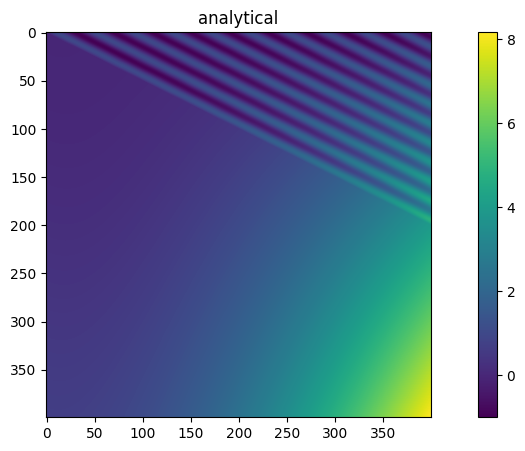

rectangle.csv
h = '0.0001\n', tau = '0.0001\n', time = '6.229066894\n'


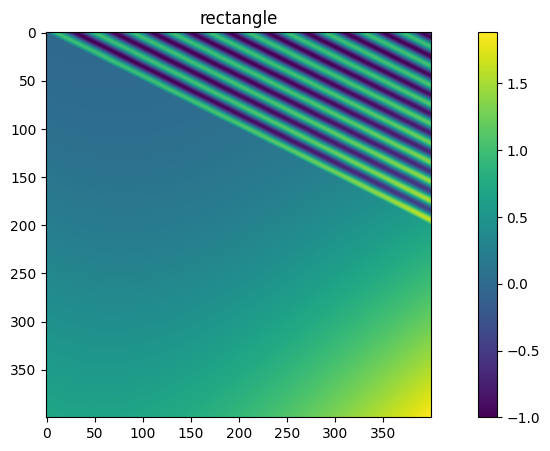

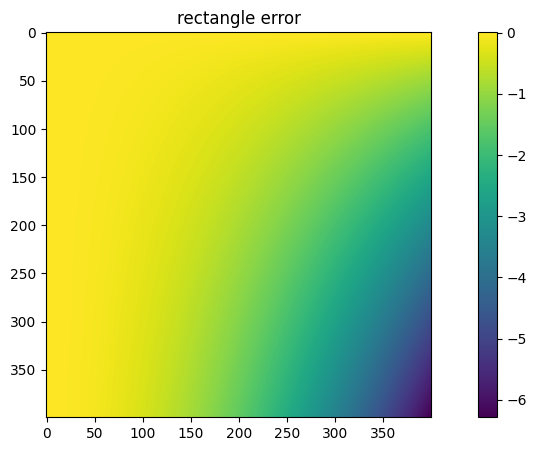

In [14]:
directory = "task8_1_data"

files = os.listdir(directory)

files.remove("analytical.csv")

with open(f"{directory}/analytical.csv", "r") as f:
    h = f.readline()        
    tau = f.readline()        
    time = f.readline()        

    print(f"{h = }, {tau = }, {time = }")

    data = []

    for line in f:
        data.append(list(map(float, line.split(",")[:-1])))
    
    plt.figure(figsize=(12, 5))
    plt.imshow(data, cmap='viridis')
    plt.colorbar()
    plt.title("analytical")
    plt.show()
    
    analytical_data = data

for file in files:
    print(file)
    if not file.endswith(".csv"):
        continue
    with open(f"{directory}/{file}", "r") as f:
        h = f.readline()        
        tau = f.readline()        
        time = f.readline()        

        print(f"{h = }, {tau = }, {time = }")

        data = []

        for line in f:
            data.append(list(map(float, line.split(",")[:-1])))
        
        plt.figure(figsize=(12, 5))
        plt.imshow(data, cmap='viridis')
        plt.colorbar()
        plt.title(file[:-4])
        plt.show()
        
    for i in range(len(data)):
        for j in range(len(data[i])):
            data[i][j] = data[i][j] - analytical_data[i][j]
            
    plt.figure(figsize=(12, 5))
    plt.imshow(data, cmap='viridis')
    plt.colorbar()
    plt.title(f"{file[:-4]} error")
    plt.show()